In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wave
#!pip install pydub
from pydub import AudioSegment
import audioop
#!pip install spicy
import scipy.io.wavfile as wavfile
from scipy import signal
import spicy
#!pip install astropy
#!pip install spicy.stats
from scipy import stats as ss
from astropy import stats
#!pip install pandas
from pandas import Series as Sp
from scipy.signal import savgol_filter
import librosa
import wave
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft


C:\Users\Justyna\Anaconda3\Pyton3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [16]:
#Długość dobrana do rozciągnięcia sygnału


len_max=52535

path2='dane/nazwy_plikow.txt'      
aa = open(path2,'r')
bb = aa.readlines()
aa.close()
count2=0
nazwa=bb[count2]
nazwa=nazwa[:-1]

it2=np.size(bb)

#Wczytanie jednej nazwy aby okreslic macierze0 (liczbe slow)


path='dane/'+nazwa+'.txt'      

a = open(path,'r')
b = a.readlines()
a.close()
it=np.size(b)

np.t0_1=np.zeros(it*(it2-1))
np.t0_2=np.zeros(it*(it2-1))
np.label0=np.zeros(it*(it2-1))
np.mean0=np.zeros(it*(it2-1))
np.energy0=np.zeros(it*(it2-1))
np.rms0=np.zeros(it*(it2-1))
np.mad0=np.zeros(it*(it2-1))
np.maximum0=np.zeros(it*(it2-1))
np.minimum0=np.zeros(it*(it2-1))
np.sma0=np.zeros(it*(it2-1))
np.inqua0=np.zeros(it*(it2-1))
np.entropyy0=np.zeros(it*(it2-1))
np. maxInds0=np.zeros(it*(it2-1))
np.meanFreq0=np.zeros(it*(it2-1))
np.skww0=np.zeros(it*(it2-1))
np.kur0=np.zeros(it*(it2-1))
np.label_label=np.zeros(it*(it2-1))
np.lengg0=np.zeros(it*(it2-1))
np.mfccs0=np.zeros([it*(it2-1), 20*103])

count=0
LABELS=[]
f=open('dane/wyniki.txt', 'a')
f.write('\t mean \t energy \t rms \t mad \t maximum \t minimum \t sma \t inqua \t entropyy \t maxInds \t meanFreq \t skww \t kur \n')


while(count2<(it2-1)):

    path2='dane/nazwy_plikow.txt'      
    aa = open(path2,'r')
    bb = aa.readlines()
    aa.close()
    nazwa=bb[count2]
    nazwa=nazwa[:-1]
 

    path='dane/'+nazwa+'.txt'      

    a = open(path,'r')
    b = a.readlines()
    a.close()
    it=np.size(b)
  
    count=0
    
    while count<it:
        
        #Rozdzielenie sygnalow
        [t1,t2,label]=b[count].split();
        if count2==0:
            LABELS.append(label)
        t1=float(t1)
        t2=float(t2)
        np.t0_1[count]=t1
        np.t0_2[count]=t1
        np.label0[count]=t1
        count=count+1
        AudioSegment.newAudio = AudioSegment.from_wav('dane/'+nazwa+'.wav')
        AudioSegment.newAudio = AudioSegment.newAudio[t1*1000:t2*1000]
        AudioSegment.newAudio.export(out_f='dane/'+label+'.wav', format='wav')
        AudioSegment.from_file('dane/'+nazwa+'.wav').export('dane/garaz.wav',  format='wav')

         #  Wczytanie slowa
        samplerate2, signal2 = wavfile.read('dane/'+label+'.wav')
        times = np.arange(len(signal2))/float(samplerate2)   
        
        #Filtracja sygnalu
        
        signal2= savgol_filter(signal2, 41, 3)
        
       #Dociecie sygnalu
        signal3=signal2**2
        #maximum
        maximum = np.amax(abs(signal3))
        thr=0.05*maximum

        i=0

        while (abs(signal3[i])<thr):
            i=i+1

        j=len(signal3)-1

        while abs(signal3[j])<thr:
            j=j-1

        signal2=signal2[i:j]


        wavfile.write(label, samplerate2, signal2)

        times=times[i:j]
        lengg=len(signal2)

        
         #Signal streching
        signal2 = librosa.core.resample(signal2.astype(float), samplerate2, samplerate2*(len_max/len(signal2)))
       
        #  Normalizacja
        max_ampl = np.max(np.abs(signal2))
        
        
        normalized_signal=signal2/max_ampl

        mfccs = librosa.feature.mfcc(signal2.astype(float),samplerate2*(len_max/len(signal2)), n_mfcc=20)
        mfccs=np.transpose(mfccs)
        mfccs=mfccs.reshape(1,20*103)
       


        freqs, times, spectrogram = signal.spectrogram(normalized_signal)

      
        #    Aritmetic mean
        mean = np.mean(normalized_signal)

    #    Energy of signal
        energy = np.sum(np.abs(normalized_signal) ** 2)

    #    RMS - root mean square (wartość skuteczna)
        rms = np.sqrt(np.mean(normalized_signal**2))

        #    Median absolute deviation    
        mad = stats.median_absolute_deviation(normalized_signal)

        #maximum
        maximum = np.amax(normalized_signal)

        #minimum
        minimum = np.amin(normalized_signal)

        #signal magnitude area

        sma=sum(normalized_signal)

        #iqr Interquartile range   połowa różnicy pomiędzy trzecim a pierwszym kwartylem
        inqua=ss.iqr(normalized_signal)

        #signal entropy

       # entropyy=ss.entropy(normalized_signal)
        bb=np.ones(len(normalized_signal))*0.00000001
        entropyy=-sum((abs(normalized_signal)+bb)*np.log(abs(normalized_signal)+bb))

        #fourier
        from scipy.fftpack import fft, ifft
        y=fft(normalized_signal)
        L=len(y)
        P2 = abs(y/L);
        P1 = P2[0:round(L/2)+1]
        P1[1:-1] = 2*P1[1:-1]

        f0 = np.linspace(0, L/2, len(P1))*samplerate2/L
    
        mm=np.amax(P1)

        maxInds=f0[list(P1).index(mm)]

        meanFreqq=f0*P1
        meanFreq=sum(meanFreqq)/sum(P1)
        skww=ss.skew(P1)
        kur=ss.kurtosis(P1, bias=True)
        

    #    Vector of speech features

        features = [mean, energy, rms, mad, maximum, minimum, sma, inqua, entropyy, maxInds, meanFreq, skww, kur]
        np.mean0[(count2*it)+(count-1)]=mean
        np.energy0[(count2*it)+(count-1)]=energy
        np.rms0[(count2*it)+(count-1)]=rms
        np.mad0[(count2*it)+(count-1)]=mad
        np.maximum0[(count2*it)+(count-1)]=maximum
        np.minimum0[(count2*it)+(count-1)]=minimum
        np.sma0[(count2*it)+(count-1)]=sma
        np.inqua0[(count2*it)+(count-1)]=inqua
        np.entropyy0[(count2*it)+(count-1)]=entropyy
        np. maxInds0[(count2*it)+(count-1)]= maxInds
        np.meanFreq0[(count2*it)+(count-1)]=meanFreq
        np.skww0[(count2*it)+(count-1)]=skww
        np.kur0[(count2*it)+(count-1)]=kur
        np.lengg0[(count2*it)+(count-1)]=lengg
        np.label_label[(count2*it)+(count-1)]=(count+1)
        np.mfccs0[(count2*it)+(count-1), :]=mfccs

        f.write(label)
        f.write('\t')
        f.write(str(mean))
        f.write('\t')
        f.write(str(energy))
        f.write('\t')
        f.write(str(rms))
        f.write('\t')
        f.write(str(mad))
        f.write('\t')
        f.write(str(maximum))
        f.write('\t')
        f.write(str(minimum))
        f.write('\t')
        f.write(str(sma))
        f.write('\t')
        f.write(str(inqua))
        f.write('\t')
        f.write(str(entropyy))
        f.write('\t')
        f.write(str(maxInds))
        f.write('\t')
        f.write(str(meanFreq))
        f.write('\t')
        f.write(str(skww))
        f.write('\t')
        f.write(str(kur))
        f.write('\n')

    count2=count2+1

f.close()


In [5]:
#Stworzenie macierzy do analizy
np.X=np.column_stack((np.lengg0, np.mean0, np.energy0, np.rms0, np.mad0, np.maximum0, np.minimum0, np.sma0, np.inqua0, np.entropyy0, np.maxInds0, np.meanFreq0, np.skww0, np.kur0, np.mfccs0))
print(np.shape(np.X))
np.X=np.mfccs0

(1204, 2074)


In [6]:
#PCA z macierzy wielu zmiennych 
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(np.mfccs0)
X_pca = pca.transform(np.X)

In [7]:
#Rozdzial danych do uczenia

np.y=np.label_label
#np.X=X_pca
#np.X=np.mfccs0
size_train=round(2*len(np.X)/3)
train_features=np.X[0:size_train,:]
train_labels=np.y[0:size_train]
test_features=np.X[size_train:,:]
test_labels=np.y[size_train:]

In [8]:
#Uczenie przy użyciu Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, oob_score=True, random_state=100000)
rf.fit(train_features, train_labels)
from sklearn.metrics import accuracy_score
predicted = rf.predict(test_features)


#Przypisanie temu samemu slowu ta sama etykiete - slowa wybrane do rozpoznania sie powtarzaly

def find_element_in_list(element, list_element):
    try:
        index_element = list_element.index(element)
        return index_element
    except ValueError:
        return None

while (find_element_in_list(27, list(test_labels))):
    ind=find_element_in_list(27, list(test_labels))
    test_labels[ind]=4
    
while (find_element_in_list(41, list(test_labels))):
    ind=find_element_in_list(41, list(test_labels))
    test_labels[ind]=4
    
while (find_element_in_list(40, list(test_labels))):
    ind=find_element_in_list(40, list(test_labels))
    test_labels[ind]=30

while (find_element_in_list(39, list(test_labels))):
    ind=find_element_in_list(39, list(test_labels))
    test_labels[ind]=12
    
while (find_element_in_list(27, list(predicted))):
    ind=find_element_in_list(27, list(predicted))
    predicted[ind]=4
    
while (find_element_in_list(41, list(predicted))):
    ind=find_element_in_list(41, list(predicted))
    predicted[ind]=4
    
while (find_element_in_list(40, list(predicted))):
    ind=find_element_in_list(40, list(predicted))
    predicted[ind]=30

while (find_element_in_list(39, list(predicted))):
    ind=find_element_in_list(39, list(predicted))
    predicted[ind]=12

#Obliczenie dokladnosci predykcji

accuracy = accuracy_score(test_labels, predicted)
print(f'Wskaznik dokladnosci predykcji: {accuracy:.3}')
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix









Wskaznik dokladnosci predykcji: 0.82


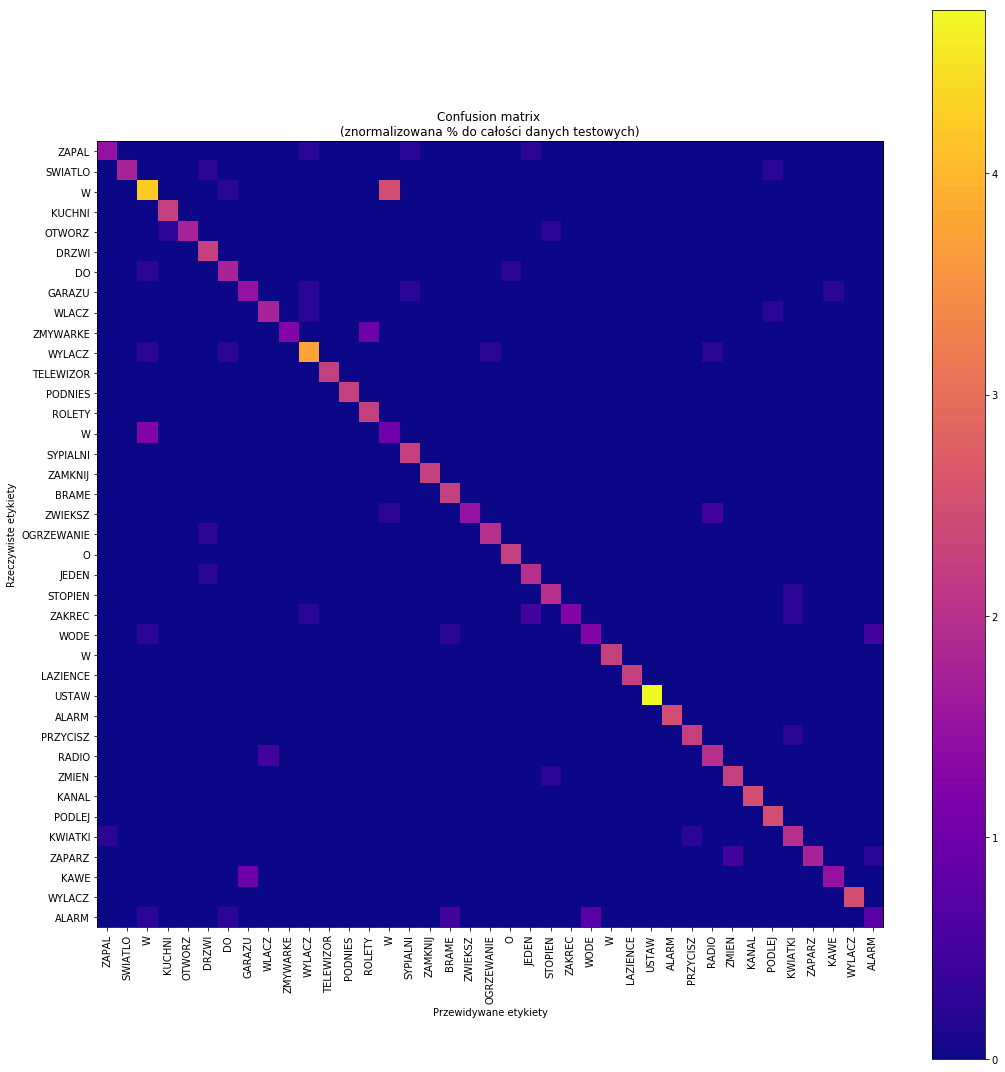

In [17]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_labels, predicted)

normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100



# Plot Results: 
width = 15
height = 15
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix, 
    interpolation='nearest', 
    cmap=plt.cm.plasma
)
plt.title("Confusion matrix \n(znormalizowana % do całości danych testowych)")
plt.colorbar()
plt.xticks(np.arange(len(LABELS)-4), LABELS, rotation=90)
plt.yticks(np.arange(len(LABELS)-4), LABELS)
plt.tight_layout()
plt.ylabel('Rzeczywiste etykiety')
plt.xlabel('Przewidywane etykiety')
plt.show()

